In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys

import numpy as np
import pandas as pd

sys.path.insert(0, '../..')
from ccal import compute_information_distance, explore_states, GPSMap

Computing column-x-column distance with <function compute_information_distance at 0x114f32d08> ...
HCC with K=4 ...
	(K=4) 30/30 - done.


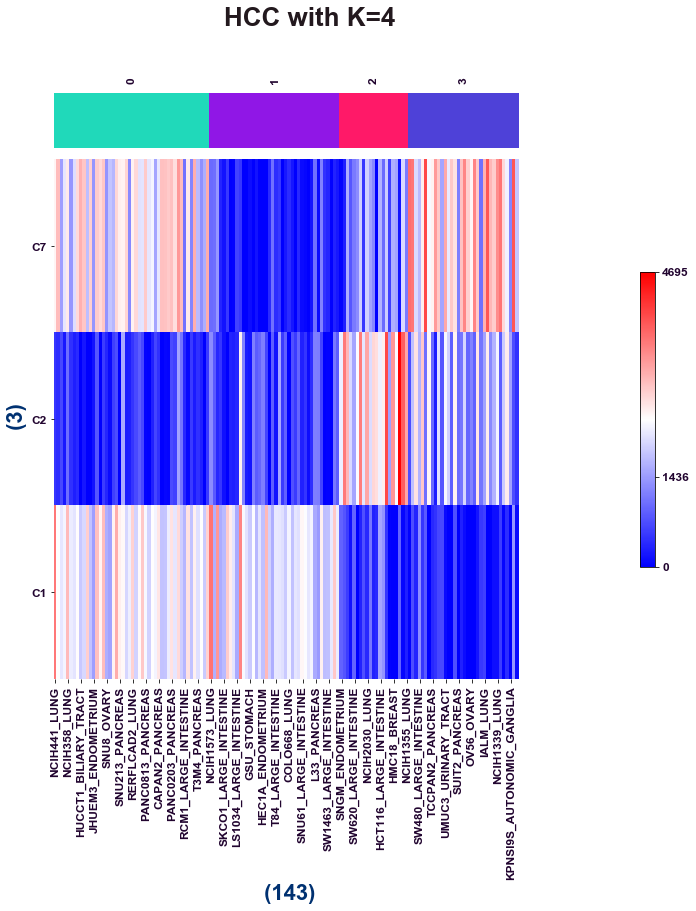

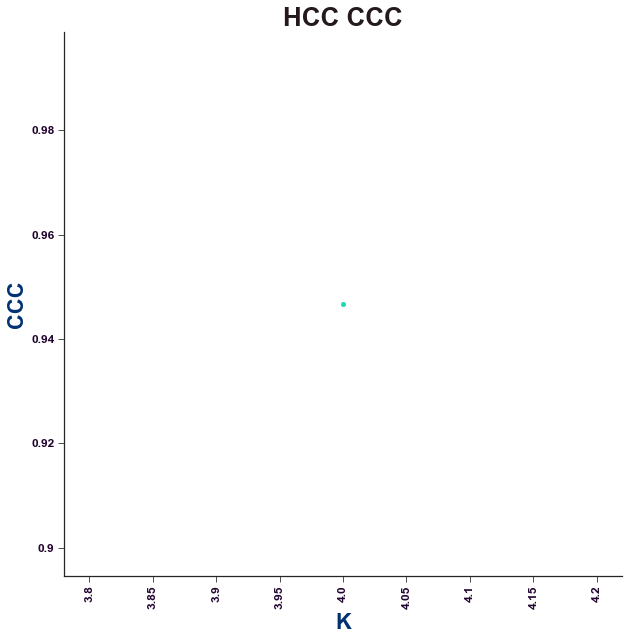

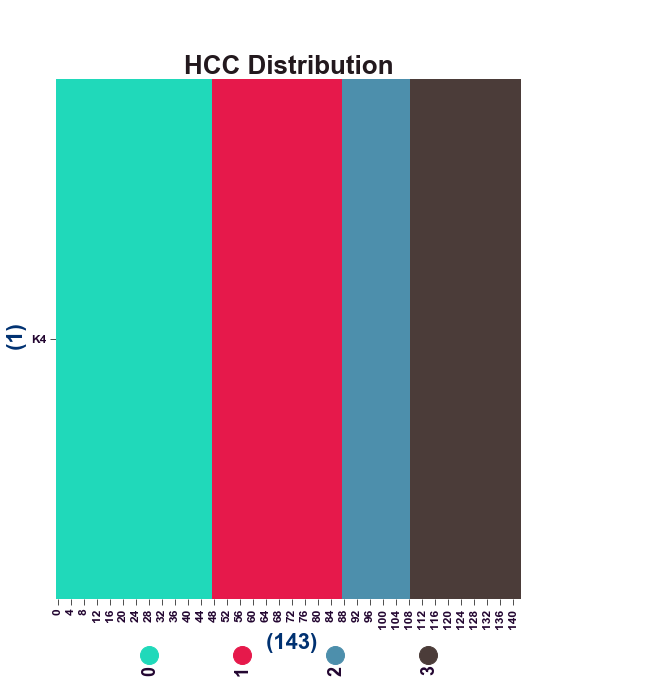

In [3]:
h = pd.read_table(
    'h_matrix__k_x_sample.tsv', sep='\t', index_col=0).loc[[
        'C7',
        'C2',
        'C1',
    ]]

distance__column_x_column, k_hcc_distance_linkage, k_hcc_distance_linkage_ccc, hcc__k_x_column = explore_states(
    h, (4, ), distance_function=compute_information_distance, plot_df=True)

In [4]:
sample_states = hcc__k_x_column.loc['K4']

/Users/k/Jumis/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kernel_density.py:161: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


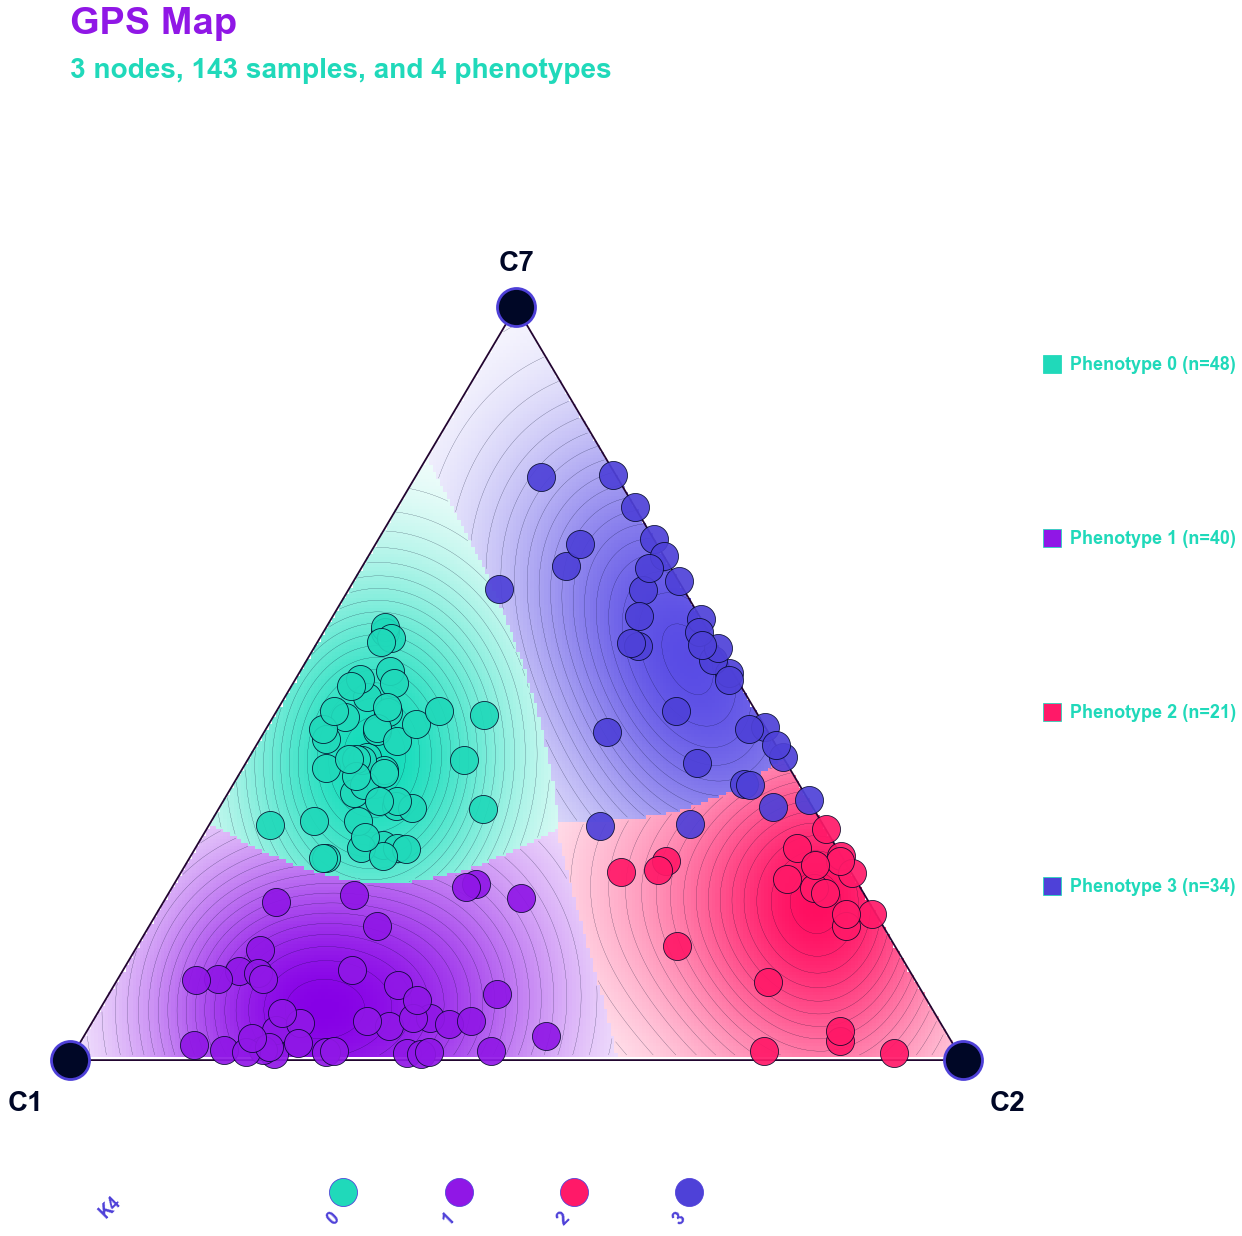

In [5]:
gps_map = GPSMap(
    h,
    pull_power=1.2,
    node_x_dimension=pd.DataFrame(
        [
            (
                0.5,
                np.sqrt(3) / 2, ),
            (
                1,
                0, ),
            (
                0,
                0, ),
        ], index=h.index))

gps_map.set_sample_phenotypes(sample_states, bandwidth_factor=2.8)

gps_map.plot_samples_with_phenotype()